# New York City Housing Price Analysis - by Kuan Hsien Lin


The goal of this project is to explore the relationship between prices and regional characteristics in the New York City real estate market. We analyze the relationship between housing prices and factors such as location, nearby facilities, and census tract data of the population. In addition, we use some Machine learning models to make predictions about the housing price by learning and identifying patterns from our datasets. This analysis will help potential real estate buyers understand which factors are important to home prices and help with investment decisions.

In this project, I use below three datasets to do New York City Housing Price Analysis. Analysis objects are mainly divided into two groups: hosuing of all types and 2b2b  (2 bedrooms and 2 bathrooms) hosuing. For hosuing of all types analysis, we focus on all feature analysis and all types of housing price forecasting. For 2b2b housing analysis, we mainly focus on 2b2b housing median price and census data characteristics of each zipcode area and 2b2b median housing price prediction. We also use maps to show which areas have high and low housing prices for 2b2b hosuing. Through these analyzes, the home buyers and investors can better understand the real estate market and provide a basis for purchasing or investment decisions. People can intuitively understand the level of 2b2b housing prices in different regions, so as to help buyers in the search for their own suitable housing as a reference. At the same time, policy makers can adjust urban planning and housing policies based on geographical analysis.

Below are three datasets sources:

- source1: Web scraping from below Real Estate website
https://www.trulia.com/NY/New_York/{zipcode}/

- source2: Overpass API
https://wiki.openstreetmap.org/wiki/Tag:railway%3Dsubway_entrance

- source3: Web scraping census data from below Unitedstateszipcode websites

 - (1). New York State Zipcode
https://www.unitedstateszipcodes.org/ny/#zips-list

 - (2). Census data for New York City Zipcode
https://www.unitedstateszipcodes.org/{zipcode}/


## Table of contents
### All Types of Housing
* [Set up the environment](#environment)
* [Data Cleaning and Data Transformation](#Data-Cleaning-and-Data-Transformation)
* [Data Combination](#Data-Combination)
* [Feature Derivation and Data Encoding](#Feature-Derivation-and-Data-Encoding)
* [Feature Analysis (Correlation) for All Types of Housing](#Feature-Analysis-(Correlation)-for-All-Types-of-Housing)
* [Machine Learning Models Analysis for Housing Price Prediction](#Machine-Learning-Models-Analysis-for-Housing-Price-Prediction)
* [Conclusion of Machine Learning Models Analysis for Housing Price Prediction](#Conclusion-of-Machine-Learning-Models-Analysis-for-Housing-Price-Prediction)
* [Visualization of Prediction Effect of Random Forest Regression Model](#Visualization-of-Prediction-Effect-of-Random-Forest-Regression-Model)
* [Top 10 Important Features for Housing Price Prediction](#Top-10-Important-Features-for-Housing-Price-Prediction)


### 2b2b Housing
* [Extracting 2b2b Housing Data](#Extracting-2b2b-Housing-Data)
* [Feature Derivation](#Feature-Derivation-2b2b)
* [Data Cleaning](#Data-Cleaning-2b2b)
* [Feature Analysis (Correlation) for 2b2b Housing](#Feature-Analysis-(Correlation)-for-2b2b-Housing)
* [Machine Learning Model Analysis for 2b2b Median Housing Price Prediction](#Machine-Learning-Model-Analysis-for-2b2b-Median-Housing-Price-Prediction)
* [Conclusion of Machine Learning Model Analysis for 2b2b Median Housing Price Prediction](#Conclusion-of-Machine-Learning-Model-Analysis-for-2b2b-Median-Housing-Price-Prediction)
* [2b2b Housing Price Distribution Map](#2b2b-Housing-Price-Distribution-Map)


### Project conclusions
* [Project Conclusions](#Project-Conclusions)



# All Types of Housing

## Set Up the Environment <a class="anchor" id="environment"></a>

In this notebook, we will need to utilize certain Python modules and functions that are not included in Python's standard library. Importing these objects and functions makes them accessible for our code execution.

Execute the cell below to import the necessary objects and functions for our analysis.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate
import numpy as np
import matplotlib.patches as mpatches
import statsmodels.api as sm
import folium
import branca

## 1. Data Cleaning and Data Transformation <a class="anchor" id="Data-Cleaning-and-Data-Transformation"></a>

We first defined a function called clean_data to clean up the DataFrame data. This function can remove duplicate instances, remove instances with null or None values, and remove rows with "unknown" values in the "Property Type" column. Then the function replace "Studio" in the "bedroom" column with 0. We read the csv files from three different sources, store them in three dataframes named source1_df, source2_df, and source3_df, and clean up the data in each DataFrame using the clean_data function.

The three csv files from three different sources in "Three Full datasets files" folder are shown as below:
- (1) source3_web_scraping_full.csv (census data from valid zipcode HTML)

- (2) source1_web_scraping_full.csv (house data)

- (3) source2_api_full.csv (facilities count around each house location)



In [2]:
def clean_data(df):
    # Remove duplicate instances (if DataFrame contains the 'address' column)
    if 'address' in df.columns:
        df.drop_duplicates(subset=["address"], inplace=True)
    else:
        df.drop_duplicates(inplace=True)

    # Delete instances with null or None values
    df.dropna(inplace=True)

    # If the DataFrame contains the "Property Type" column, delete the rows in the "Property Type" column whose value is "unknown"
    if 'Property Type' in df.columns:
        df = df[df['Property Type'] != 'unknown']

    # If the DataFrame contains the "bedroom" column, replace "Studio" with 0
    if 'bedroom' in df.columns:
        df.loc[df['bedroom'] == 'Studio', 'bedroom'] = 0

    return df

# Make sure the folder path is correct
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, "Three Full datasets files_no_clean")

# The path to each child folder
source1_folder = os.path.join(data_folder, "source1_Web_Scraping")
source2_folder = os.path.join(data_folder, "source2_API")
source3_folder = os.path.join(data_folder, "source3_Web_Scraping")

# The path of each csv file
source1_path = os.path.join(source1_folder, "source1_web_scraping_full.csv")
source2_path = os.path.join(source2_folder, "source2_api_full.csv")
source3_path = os.path.join(source3_folder, "source3_web_scraping_full.csv")

# Read three csv files
source1_df = pd.read_csv(source1_path)
source2_df = pd.read_csv(source2_path)
source3_df = pd.read_csv(source3_path)

# Clean up data
source1_df = clean_data(source1_df)
source2_df = clean_data(source2_df)
source3_df = clean_data(source3_df)


# Store the merged DataFrame as a new csv file
source1_df.to_csv("source1_web_scraping_full_clean.csv", index=False)
source2_df.to_csv("source2_api_full_clean.csv", index=False) 
source3_df.to_csv("source3_web_scraping_full_clean.csv", index=False)

print("Three datasets have been successfully cleaned and saved as CSV file.")

Three datasets have been successfully cleaned and saved as CSV file.


## 2. Data Combination <a class="anchor" id="Data-Combination"></a>

We merge three data sets in this step. First, the source1_df and source2_df are merged according to address, latitude, and longitude, and then the result is merged with the source3_df according to zipcode. We generate the final merged DataFrame final_df. Then, we make sure to delete the instances with null values and store the combined DataFrame as a new csv file, Combined_three_datasets.csv. Finally, the success prompt is printed.

In [3]:
# Merge source1_df and source2_df by address, latitude, and longitude
merged_df = source1_df.merge(source2_df, on=["address", "latitude", "longitude"], how="left")

# Merge merged_df with source3_df according to zipcode
final_df = merged_df.merge(source3_df, on="zipcode", how="left")

final_df.dropna(inplace=True)

# Store the merged DataFrame as a new csv file
final_df.to_csv("Combined_three_datasets.csv", index=False)

print("Three datasets have been successfully cleaned, combined, and saved as Combined_three_datasets.csv")


Three datasets have been successfully cleaned, combined, and saved as Combined_three_datasets.csv


## 3. Feature Derivation and Data Encoding <a class="anchor" id="Feature-Derivation-and-Data-Encoding"></a>

We create new features by manipulating and combining existing features in the original data. In this example, the number of multiple facilities in the data set is summed. The result is added to the data set as a new feature, "total_amenities", thus providing more useful information to facilitate better analysis. In addition, the Property type is thermally encoded. This step transforms the categorical variables into numerical variables that the model can use. For the Property Type field, we convert boolean values (True/False) to 0 and 1. True is represented as 1 and False is represented as 0.

In [4]:
import pandas as pd

df = final_df

# Creates a new column that contains the sum of the number of facilities
df = df.assign(total_amenities=df.Subway_count + df.School_count + df.Park_count + df.Metro_count + df.Bus_count +
               df.Supermarket_count + df.Bank_count + df.Parking_count + df.Cinema_count + df.Mall_count +
               df.Restaurant_count + df.Gym_count + df.Boutique_count + df.Museum_count + df.Arts_count + df.Theatre_count)


# One hot encoding for Property Type
df = pd.get_dummies(df, columns=["Property Type"])

# Change boolen value to 0 and 1
bool_columns = [
    'Property Type_apartment',
    'Property Type_condo',
    'Property Type_coop',
    'Property Type_multi-family',
    'Property Type_single-family home',
    'Property Type_mobile/manufactured',
    'Property Type_townhouse'
]

for col in bool_columns:
    df[col] = df[col].astype(int)
    
    
print("Data has been successfully encoded")
    

Data has been successfully encoded


## 4. Feature Analysis (Correlation) for All Types of Housing <a class="anchor" id="Feature-Analysis-(Correlation)-for-All-Types-of-Housing"></a>

This section is the operation of feature analysis, which is important preprocessing steps in machine learning and data analysis. In feature analysis, we can use a correlation matrix to calculate the correlation among features to select better features to train the model. In addition, heat maps can be drawn to visualize the correlations between features to understand better the relationships between different features in the data set. In this example, we use the correlation matrix and heat map to analyze the correlation between different features in the house price data set to find the top five features most relevant to prices.

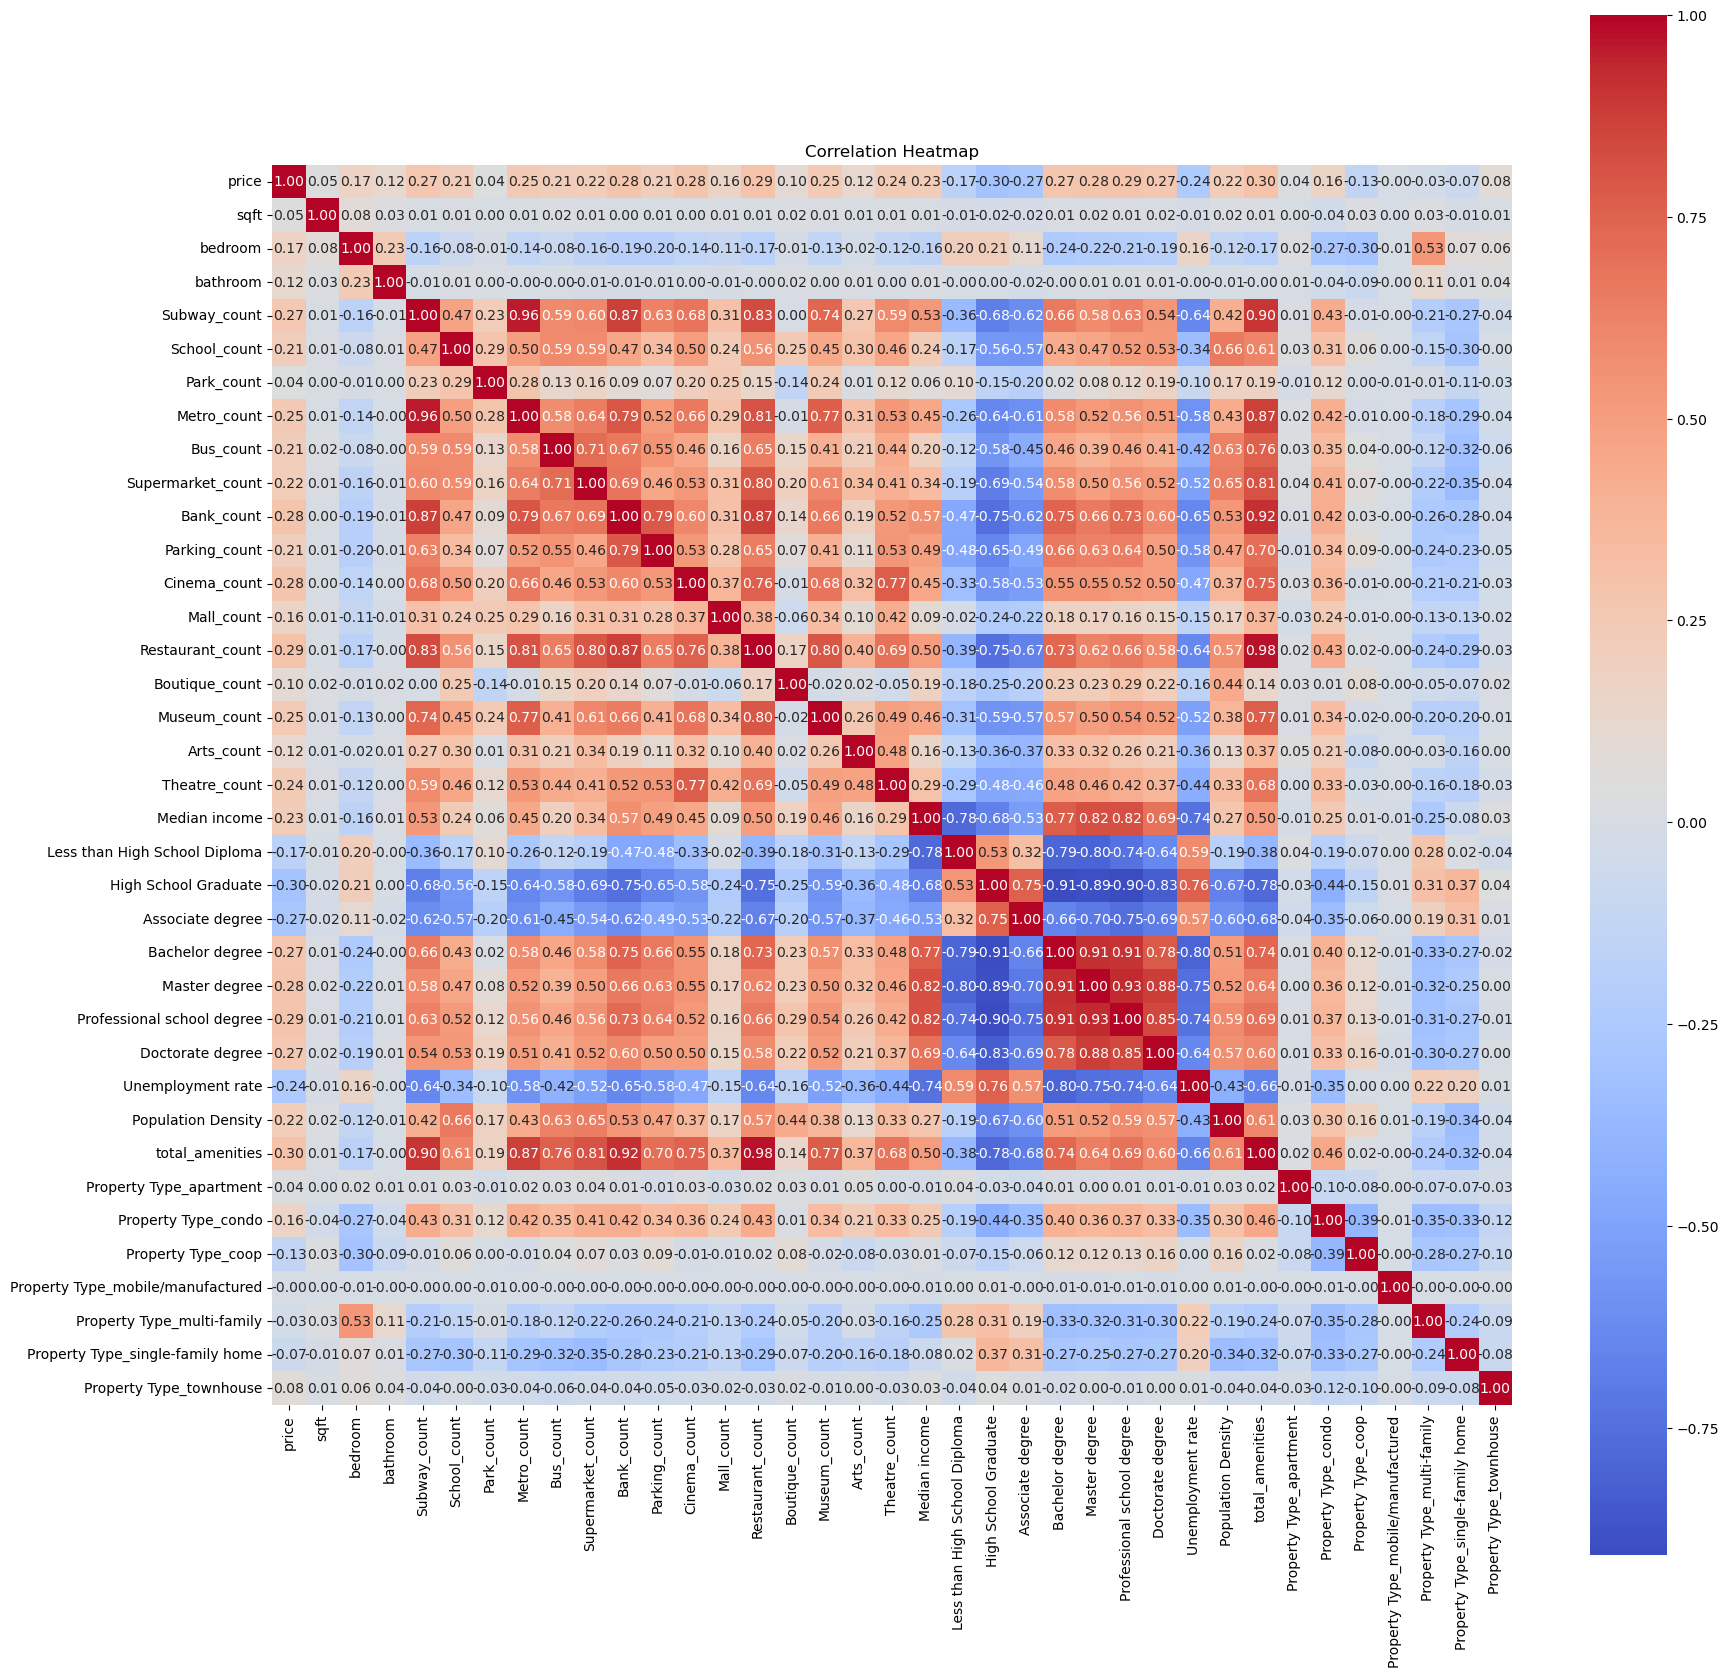

Top 5 Positively correlated features:
                            Positive Correlation
Feature                                         
total_amenities                         0.298844
Restaurant_count                        0.292281
Professional school degree              0.289400
Cinema_count                            0.281617
Master degree                           0.277562

Top 5 Negatively correlated features (Absolute Value):
                               Negative Correlation
Feature                                            
High School Graduate                       0.297494
Associate degree                           0.271405
Unemployment rate                          0.238329
Less than High School Diploma              0.171795
Property Type_coop                         0.133631


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Delete columns that do not need to calculate dependencies (address, latitude and longitude)
df = df.drop(columns=["address", "latitude", "longitude", "Median home value", "Gym_count", "zipcode"])

# Computed correlation matrix
corr_matrix = df.corr()

# Calculate correlations between prices and other characteristics
price_corr = corr_matrix["price"]

# Mapping heat map
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Calculate correlations between prices and other features and rank them
price_corr_sorted = price_corr.sort_values(ascending=False)

# Separate positive and negative correlation features
positive_corr = price_corr_sorted[price_corr_sorted > 0]
negative_corr = price_corr_sorted[price_corr_sorted < 0]

# The negative correlation features are sorted by absolute value
negative_corr_abs_sorted = negative_corr.abs().sort_values(ascending=False)

# Get the first five positively correlated features
top_5_positive = positive_corr.iloc[1:6] 

# Get the first five negatively correlated features (sorted by absolute value)
top_5_negative = negative_corr_abs_sorted.iloc[:5]

# Create a DataFrame with a positive correlation between the top five features
positive_features = top_5_positive.to_frame()
positive_features.columns = ['Positive Correlation']
positive_features.index.name = 'Feature'

# Create a DataFrame that negatively relates the first five characteristics
negative_features = top_5_negative.to_frame()
negative_features.columns = ['Negative Correlation']
negative_features.index.name = 'Feature'

# Prints the DataFrame for the top five features of positive and negative correlation
print("Top 5 Positively correlated features:")
print(positive_features)
print("\nTop 5 Negatively correlated features (Absolute Value):")
print(negative_features)


**The top five correlation coefficients of both positive and negative correlations are all less than 0.5, which means that the linear relationship between the features and the target variable is weak.**

## 5. Machine Learning Models Analysis for Housing Price Prediction <a class="anchor" id="Machine-Learning-Models-Analysis-for-Housing-Price-Prediction"></a>

When the absolute value of correlation coefficients between all features and the target variable is less than 0.5, it indicates no strong linear relationship between them and the target variable. This may be because of the complexity of the data, some of the features may have a more complex nonlinear relationship with the target variable, or multiple features may interact to affect the target variable. In this case, simple linear regression may not be enough to capture all the information and patterns. Therefore, we consider using Lasso regression because it can handle certain nonlinear relations and has the property of feature selection.


## 5.1 Feature Scaling

Before doing machine learning analysis, we need to normalize the data, a common feature scaling method used to scale the values of different features into the same range to train better and compare different models. We use the MinMaxScaler class, which scales the feature to a range between 0 and 1. The advantage of normalization is that it can avoid the excessive influence of some features on the model. After normalization, we convert the normalized data back to the Data frame that uses the field name of the original Data Frame.

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# The data is normalized
data_normalized = scaler.fit_transform(df)

# Converts the normalized data back to the DataFrame, using the column name of the original DataFrame
df_normalized = pd.DataFrame(data_normalized, columns=df.columns)


## 5.2 Build and Evaluate Prediction Models

### 5.2.1 Lasso Regression Model Analysis

In the Lasso regression model, we select all features from the normalized data set and use Lasso regression model to fit the training set, and the test set is predicted. Finally, the mean square error and R-squared were used to evaluate the performance of the model.

In [7]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create data box from raw data
data_lasso = df_normalized

# Preprocess data: Separate feature and target variables
X_la = data_lasso.drop("price", axis=1)
y_la = data_lasso["price"]

# Standardize the data
scaler_la = StandardScaler()
X_scaled_la = scaler_la.fit_transform(X_la)

# Divide the data into training sets and test sets
X_train_la, X_test_la, y_train_la, y_test_la = train_test_split(X_scaled_la, y_la, test_size=0.3, random_state=42)

# Training LASSO regression model (the degree of regularization can be controlled by adjusting the alpha parameter)
lasso = Lasso(alpha=0.0014, max_iter=5000000)
lasso.fit(X_train_la, y_train_la)

# The trained LASSO regression model was used for prediction
y_pred_la = lasso.predict(X_test_la)

# Make predictions on the training set
y_train_pred_la = lasso.predict(X_train_la)

# Calculate the mse and r squared score on the training set
mse_train_la = mean_squared_error(y_train_la, y_train_pred_la)
r2_train_la = r2_score(y_train_la, y_train_pred_la)

# Calculate the mse and r squared score on the test set
mse_test_la = mean_squared_error(y_test_la, y_pred_la)
r2_test_la = r2_score(y_test_la, y_pred_la)

# Print mse and r squared score for training and testing set
print("Training set:")
print("MSE: {:.8f}".format(mse_train_la))
print("R²: {:.2f}".format(r2_train_la))

print("\nTest set:")
print("MSE: {:.8f}".format(mse_test_la))
print("R²: {:.2f}".format(r2_test_la))


Training set:
MSE: 0.00028585
R²: 0.16

Test set:
MSE: 0.00017994
R²: 0.15


### Outcome analysis of housing price prediction using Lasso Regression model

**Lasso regression does not perform well on our data set. My data set may have complex non-linear or feature interactions that can cause linear models not to capture the underlying structure of the data well. We can then try to use more complex models, such as decision trees and random forests, to find the best combination of models and features.**

### 5.2.2 Decision Tree Regression Model Analysis

We use the decision tree regression model to train and forecast the normalized data set. We select all features as independent variables, and the target variable is housing price. The ratio of the training set to the test set is 7:3. After training the model, the model was used to predict the training set and the test set. The mean square error and R squared values are calculated to evaluate the model's performance. We adjusted min_samples_split and min_samples_leaf to find the best model performance and make sure the model didn't overfit.

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data_de = df_normalized

# Define characteristics and target variables
X_de = data_de.drop("price", axis=1)
y_de = data_de["price"]

# Divide the training set and test set
X_train_de, X_test_de, y_train_de, y_test_de = train_test_split(X_de, y_de, test_size=0.3, random_state=42)

# Create a decision tree model
dt = DecisionTreeRegressor(max_depth=9, min_samples_split=2, min_samples_leaf=13,random_state=42)

# training model
dt.fit(X_train_de, y_train_de)

# Evaluation model performance
y_pred_train_de = dt.predict(X_train_de)
y_pred_test_de = dt.predict(X_test_de)

mse_train_de = mean_squared_error(y_train_de, y_pred_train_de)
mse_test_de = mean_squared_error(y_test_de, y_pred_test_de)

r2_train_de = r2_score(y_train_de, y_pred_train_de)
r2_test_de = r2_score(y_test_de, y_pred_test_de)

# Print mse and r squared score for training and testing set
print("Training set:")
print("Mean Squared Error: {:.8f}".format(mse_train_de))
print("R-squared: {:.2f}".format(r2_train_de))

print("\nTest set:")
print("Mean Squared Error: {:.8f}".format(mse_test_de))
print("R-squared: {:.2f}".format(r2_test_de))


Training set:
Mean Squared Error: 0.00012662
R-squared: 0.63

Test set:
Mean Squared Error: 0.00007307
R-squared: 0.65


### Outcome analysis of housing price prediction using Decision Tree model

**Compared with Lasso, decision tree model performs better. Because the decision tree model can capture the nonlinear relationship between features, it is helpful to improve the performance of the model.**

### 5.2.3 Random Forest Regression Model Analysis

In addition, we use Random Forest regression model to train and forecast the normalized data set. All features are selected as independent variables, and the target variable is housing price. The ratio of the training set to the test set is 7:3. After training the model, the model is used to predict the training set and the test set. The mean square error and R squared values are calculated to evaluate the model's performance. We adjusted n_estimators, min_samples_split and min_samples_leaf to find the best model performance and make sure the model did not overfit.


### 5.2.10 Random Forest Regression Model Using All Features

In this Random Forest regression model, we select all features as independent variables, and the target variable is housing price. After training the model, the model was used to predict the training set and the test set. The mean square error and R squared values were calculated to evaluate the model's performance. We adjusted n_estimators, min_samples_split and min_samples_leaf to find the best model performance and make sure the model didn't overfit.

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data_rf = df_normalized

X_rf = data_rf.drop("price", axis=1)
y_rf = data_rf["price"]


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)


# Create a random forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=4,random_state=42)

rf.fit(X_train_rf, y_train_rf)

y_pred_train_rf = rf.predict(X_train_rf)
y_pred_test_rf = rf.predict(X_test_rf)

mse_train_rf = mean_squared_error(y_train_rf, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test_rf, y_pred_test_rf)

r2_train_rf = r2_score(y_train_rf, y_pred_train_rf)
r2_test_rf = r2_score(y_test_rf, y_pred_test_rf)

mae_train_rf = mean_absolute_error(y_train_rf, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test_rf, y_pred_test_rf)


print("Training set:")
print("Mean Squared Error: {:.8f}".format(mse_train_rf))
print("R-squared: {:.2f}".format(r2_train_rf))

print("\nTest set:")
print("Mean Squared Error: {:.8f}".format(mse_test_rf))
print("R-squared: {:.2f}".format(r2_test_rf))


Training set:
Mean Squared Error: 0.00006156
R-squared: 0.82

Test set:
Mean Squared Error: 0.00004013
R-squared: 0.81


### Outcome analysis of housing price prediction using Random Forest models

**Random Forest model performs better than decision trees. Since Random Forest is composed of multiple decision trees, it can also better capture the nonlinear relationship between features to help improve the performance of the model.**

## 6. Conclusion of Machine Learning Models Analysis for Housing Price Prediction <a class="anchor" id="Conclusion-of-Machine-Learning-Models-Analysis-for-Housing-Price-Prediction"></a> 

We organized all models' result (including Lasso, Decision Tree, and Random Forest model) in the table.

In [10]:
from tabulate import tabulate

# Collect evaluation metrics for each model
data = [
    ("Mean Squared Error (Training)", mse_train_la, mse_train_de, mse_train_rf),
    ("R-squared (Training)", r2_train_la, r2_train_de, r2_train_rf),
    ("Mean Squared Error (Test)", mse_test_la, mse_test_de, mse_test_rf),
    ("R-squared (Test)", r2_test_la, r2_test_de, r2_test_rf)
]

# Defines a table header
headers = ["Evaluation Index", "Lasso", "Decision Tree", "Random Forest"]

# Print table
print(tabulate(data, headers=headers, tablefmt='pretty'))


+-------------------------------+-----------------------+------------------------+-----------------------+
|       Evaluation Index        |         Lasso         |     Decision Tree      |     Random Forest     |
+-------------------------------+-----------------------+------------------------+-----------------------+
| Mean Squared Error (Training) | 0.0002858490776420378 | 0.00012662190614502457 | 6.156194738492702e-05 |
|     R-squared (Training)      |  0.15852641718462412  |   0.6272543892543361   |  0.8187758629189715   |
|   Mean Squared Error (Test)   | 0.0001799353222560663 | 7.307388824734906e-05  | 4.013481599307881e-05 |
|       R-squared (Test)        |  0.14743690680444932  |   0.6537639224202654   |  0.8098346537029645   |
+-------------------------------+-----------------------+------------------------+-----------------------+


**According to previous all models results, we found that the Random Forest model performs better than other models in predicting all housing prices, which may be due to the existence of a nonlinear relationship in our data, while Lasso regression have a poor fitting effect on the nonlinear relationship. Furthermore, the Random Forest performs better than Decision Tree because Random Forests combine multiple decision trees, reducing the model’s variance and improving the prediction accuracy. Overall, Random Forest performs best on this data set and is the best prediction of house prices.**

## 7. Visualization of Prediction Effect of Random Forest Regression Model <a class="anchor" id="Visualization-of-Prediction-Effect-of-Random-Forest-Regression-Model"></a> 

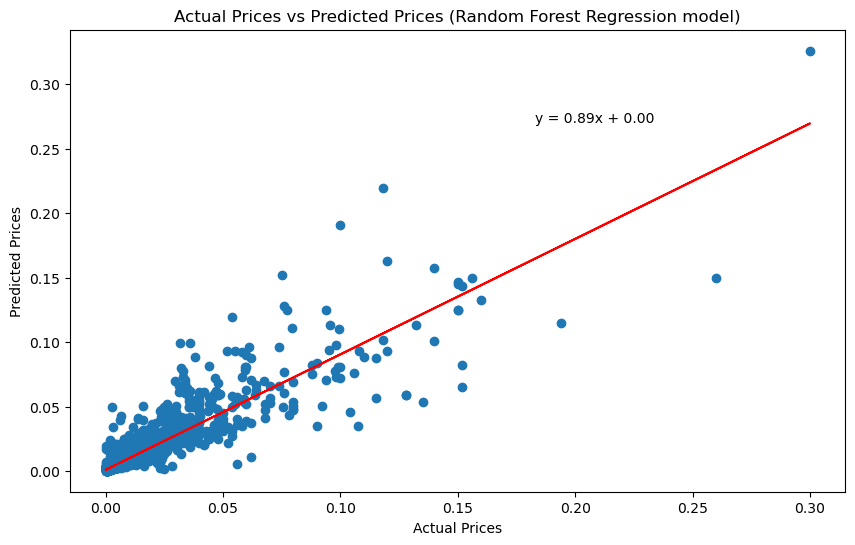

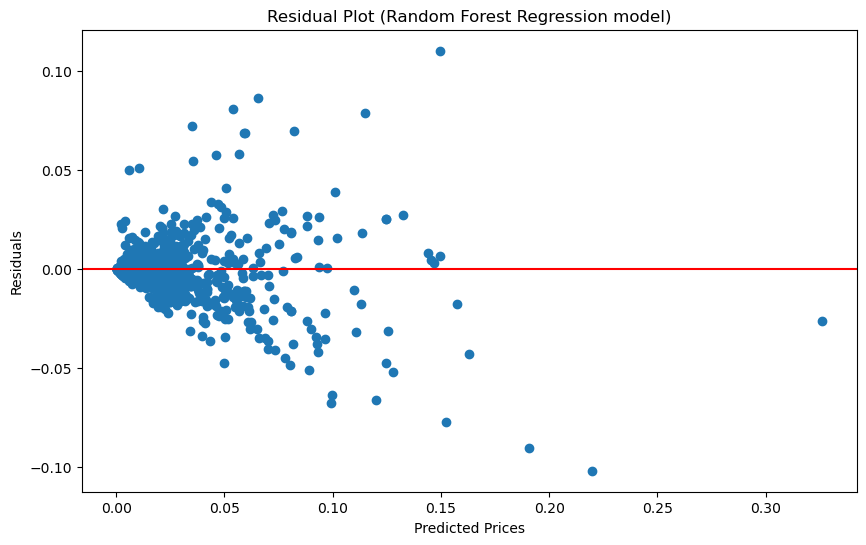

In [11]:
import numpy as np

# Plot a scatter plot to show the relationship between the actual value and the predicted value
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_test_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (Random Forest Regression model)')

# Add a regression line
z = np.polyfit(y_test_rf, y_pred_test_rf, 1)
p = np.poly1d(z)
plt.plot(y_test_rf, p(y_test_rf), color='red')

# Add comments showing the coefficients and slopes of the polynomial
plt.annotate('y = {:.2f}x + {:.2f}'.format(z[0], z[1]), xy=(0.6, 0.8), xycoords='axes fraction')

residuals = y_test_rf - y_pred_test_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_rf, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regression model)')
plt.show()


The prediction effect and residual chart of Random Forest model are shown above. Random forest model is a nonlinear model, which combines many Decision Tree to make prediction. Therefore, a linear regression line representing the random forest model cannot be drawn directly. In this case, we can approximate the predicted results of the model by adding a simulated regression line (y = 0.89x) but note that this line represents only a general trend and may not fully capture the non-linear behavior of the model. From the prediction results and residual illustrations, most of the points in the data were captured by the model, but there were still some points with significant differences in residual compared with other data points. These points could be data errors or phenomena that the model failed to capture. We may need to further study these points later to determine if we need to revise the data or improve the model

## 8. Top 10 Important Features for Housing Price Prediction <a class="anchor" id="Top-10-Important-Features-for-Housing-Price-Prediction"></a>

We plot the importance of each feature from Random Forest model. This helps us identify the features that have the most impact on predicting housing price. We sorted in descending order by the feature importance. Finally, the top 10 most important features are listed, and the feature importance map is drawn to visualize the feature importance.


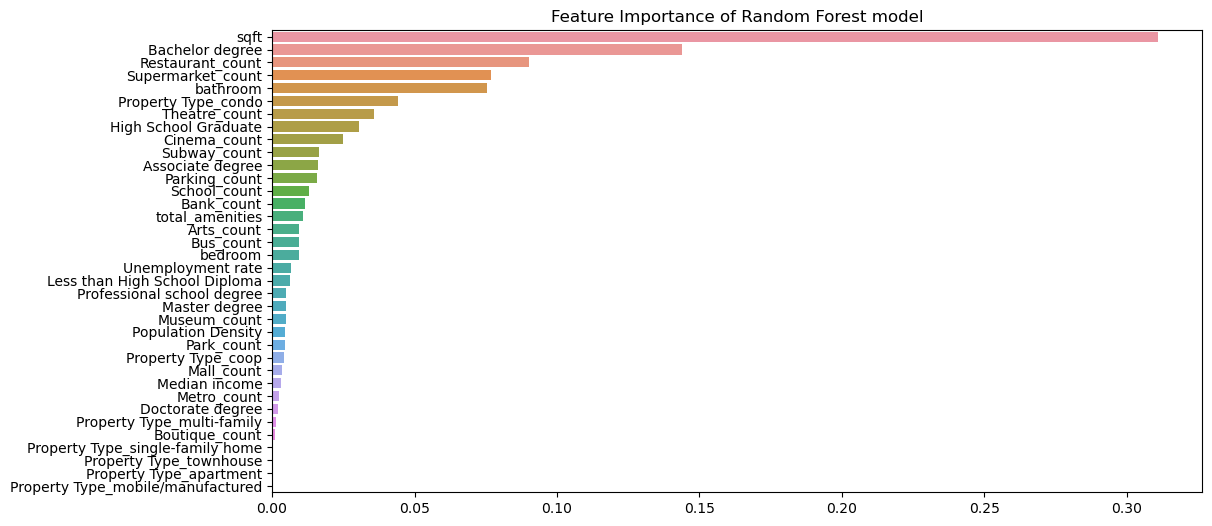


Top 10 important features for Random Forest model:
             feature  importance
                sqft    0.310890
     Bachelor degree    0.143949
    Restaurant_count    0.090117
   Supermarket_count    0.076985
            bathroom    0.075386
 Property Type_condo    0.044047
       Theatre_count    0.035667
High School Graduate    0.030635
        Cinema_count    0.024793
        Subway_count    0.016358


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract the importance of features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_rf.columns

#  Plot feature importance chart
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importance of Random Forest model')
plt.show()

# Acquired feature importance
feature_importances = rf.feature_importances_

# Associate feature importance with feature names
feature_importances_df = pd.DataFrame({"feature": X_rf.columns, "importance": feature_importances})

# Rank the importance of features in descending order
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

# Output the top 10 most important features
N = 10 
print("\nTop {} important features for Random Forest model:".format(N))
print(feature_importances_df.head(N).to_string(index=False))

Random Forest is a tree-based model that does not provide a traditional coefficient or weight, as linear regression models do. This is because the prediction of the Random Forest model is obtained by averaging or voting the prediction results of multiple decision trees, and each decision tree is predicted by a series of if-else decision rules, rather than by a linear combination of features. Random Forest model can provide the importance of each feature.

Feature importance can be regarded as the contribution of a certain feature to the prediction result. According to the Feature Importance of Random Forest model chart, the importance of sqft feature is the highest, about 0.311. This could mean that the number of square feet of a home plays a key role in predicting prices. In other words, the size of a home is probably the most important factor affecting the price of a home. Then the importance of a bachelor’s degree is 0.144, ranking second. This could mean that the number of people with bachelor's degrees, perhaps in a particular region or neighborhood, is also important in predicting house prices. This may have something to do with education levels and economic conditions in the area. The importance of the count of restaurants, supermarkets, and bathrooms are 0.090, 0.077, and 0.075, respectively, which also play a certain role in affecting the housing price. Finally, some features such as Property Type Condo, Theatre count, High School Graduate, Cinema count, and "Subway count "are less important but still contribute to the predicted results.


# 2b2b Housing

From below link, we know that two bedrooms and two bathroom type are essentially the “bread and butter” of the housing sales market in NYC and are the most in demand properties. We wanted to find out whether the median home price in the New York City area is related to income, unemployment rate, and educational level, and explore the location of high and low housing prices.

https://nikkiinnyc.com/2022/07/28/how-much-does-it-cost-to-own-a-2-bedroom-in-nyc-july-2022/

## 1. Extracting 2b2b Housing Data <a class="anchor" id="Extracting-2b2b-Housing-Data"></a> 

According to the number of bedrooms and bathrooms in the existing DataFrame, we screened out the information of the properties containing only 2 bedrooms and 2 bathrooms. We stored the data of these properties in a new CSV file. 

In [13]:
import pandas as pd

# Read the previously merged csv files
combined_df = final_df

#Convert the data types of the bedroom and bathroom columns to floating point numbers
combined_df["bedroom"] = combined_df["bedroom"].apply(lambda x: float(x) if x != "Studio" else 0)
combined_df["bathroom"] = combined_df["bathroom"].astype(float)

# Filter information for 2 bedrooms and 2 bathrooms
filtered_2b2b_df = combined_df[(combined_df["bedroom"] == 2) & (combined_df["bathroom"] == 2)]

print("2b2b properties have been successfully extracted")

2b2b properties have been successfully extracted


## 2. Feature Derivation  <a class="anchor" id="Feature-Derivation-2b2b"></a> 

We group the prices in the data set using the zip code of the selected 2-bedroom and 2-bathroom properties as the key, calculate the median price in each zip code, and store the results as a new data frame (zipcode_summary).

In [14]:
data_2b2b = filtered_2b2b_df

# Group by zip code and calculate the median home prices for each zip code
zipcode_summary = data_2b2b.groupby('zipcode')['price'].agg(['median'])

# Rename the column name
zipcode_summary.columns = ['median_housing_price']

# Reset the index so that the zip code becomes a regular column
zipcode_summary.reset_index(inplace=True)

# Show result
print("zipcode_summary:")
print(zipcode_summary)


zipcode_summary:
     zipcode  median_housing_price
0      10001             2380000.0
1      10002             2235000.0
2      10003             2100000.0
3      10004             1895000.0
4      10005             1825000.0
..       ...                   ...
150    11435              427000.0
151    11436              607500.0
152    11691              155000.0
153    11693              849000.0
154    11694              742000.0

[155 rows x 2 columns]


## 3. Data Cleaning <a class="anchor" id="Data-Cleaning-2b2b"></a> 

Finally, we combine the original data set with the statistical data frame (zipcode_summary) to generate a new data frame (merged_df_2b2b). It includes the median home price for each zip code and other characteristics, such as income, unemployment rate, and educational level. At the same time, duplicate data was de-processed, and instances containing null, or None values and unwanted features were removed.

In [15]:
merged_df_2b2b = source3_df.merge(zipcode_summary, on=["zipcode"], how="left")

merged_df_2b2b.drop_duplicates(subset=["zipcode"], inplace=True)

merged_df_2b2b.dropna(inplace=True)

# Delete unnecessary features
merged_df_2b2b = merged_df_2b2b.drop(columns=["Median home value", 'zipcode'])



## 4. Feature Analysis (Correlation) for 2b2b Housing <a class="anchor" id="Feature-Analysis-(Correlation)-for-2b2b-Housing"></a>

We want to analyze the correlation between the census tract feature and the price of a two-bedroom and two-bathroom property to understand which feature might have a positive or negative impact on the price of a house.

First, the correlation between each feature can be visually observed by calculating the correlation matrix and drawing the thermal map. The darker the color of the thermal map, the stronger the correlation between the two features. Next, the features with a positive correlation coefficient greater than 0.5 and a negative correlation coefficient less than -0.5 are screened and stored in positive_corr_df and negative_corr_df, respectively. The property price itself is excluded. Finally, the positive and negative correlation features were merged into a DataFrame, and the horizontal bar chart visualized the features and their correlation coefficients. The positive correlation features were represented in blue. In contrast, the negative correlation features were represented in red, and the size of the points represented the absolute value of the correlation coefficients.

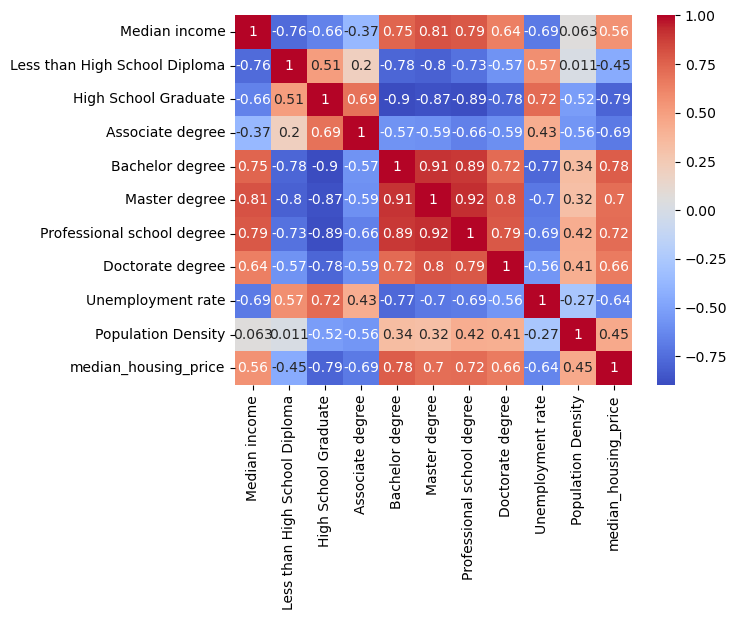

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Computed correlation matrix
corr_matrix_2b2b = merged_df_2b2b.corr()

# Output the part of the correlation matrix related to 2b2b median house prices
price_corr_2b2b = corr_matrix_2b2b['median_housing_price']

# Create a heat map
sns.heatmap(corr_matrix_2b2b, annot=True, cmap='coolwarm')
plt.show()

# Calculate correlations between prices and other features and rank them
price_corr_sorted_2b2b = price_corr_2b2b.sort_values(ascending=False)

# Screening features with positive correlation coefficient greater than 0.5
positive_corr_2b2b = price_corr_2b2b[price_corr_2b2b > 0.5]

# Screening features with negative correlation coefficient less than -0.5
negative_corr_2b2b = price_corr_2b2b[price_corr_2b2b < -0.5]

# Store the filtered positive correlation coefficients into a new DataFrame
positive_corr_df_2b2b = pd.DataFrame(positive_corr_2b2b).reset_index()
positive_corr_df_2b2b.columns = ['Feature', 'Correlation']
positive_corr_df_2b2b = positive_corr_df_2b2b[positive_corr_df_2b2b['Feature'] != 'median_housing_price']

# Store the filtered negative correlation coefficients into a new DataFrame
negative_corr_df_2b2b = pd.DataFrame(negative_corr_2b2b).reset_index()
negative_corr_df_2b2b.columns = ['Feature', 'Correlation']
negative_corr_df_2b2b = negative_corr_df_2b2b[negative_corr_df_2b2b['Feature'] != 'median_housing_price']

# Combine the positive and negative correlation characteristics into a single DataFrame
combined_corr_df = pd.concat([positive_corr_df_2b2b, negative_corr_df_2b2b], axis=0)

# Create a color column to represent positive and negative correlations
combined_corr_df['color'] = combined_corr_df['Correlation'].apply(lambda x: 'red' if x > 0 else 'blue')

# Create a size column that represents the absolute value of the correlation coefficient
combined_corr_df['size'] = abs(combined_corr_df['Correlation']) * 200

# Create a new figure
plt.figure(figsize=(10, 5))

# Create the barplot using seaborn's barplot function
sns.barplot(data=combined_corr_df, x='Correlation', y='Feature', hue='color', dodge=False, palette={"blue": "blue", "red": "red"})

# Add titles and labels
plt.title('Features with correlation greater than 0.5 or less than -0.5 for 2b2b housing')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')

# Define the legend label
blue_patch = mpatches.Patch(color='blue', label='Negative Correlation')
red_patch = mpatches.Patch(color='red', label='Positive Correlation')

# add legend
plt.legend(handles=[red_patch, blue_patch])

# show plot
plt.show()


According to the results of correlation analysis, we can draw the following conclusions according to the positive and negative correlation of data and the strength of correlation (the absolute value of correlation coefficient):

Education level: bachelor’s degree (0.78), Master's degree (0.70), Professional school degree (0.72), and Doctorate degree (0.66) all show that higher education level is strongly positively correlated with higher median housing prices. This may be because higher education often correlates with higher incomes, which enable people to buy more expensive properties.

Income level: The correlation coefficient of Median income (0.56) indicates a strong positive correlation between the median income level and the median house price. Because residents in areas with higher income levels are more likely to be able to buy more expensive properties.

Population Density: The correlation coefficient of Population Density (0.45) indicates a moderate positive correlation between population density and median housing price. Areas with high population density may attract more people due to factors such as location and job opportunities, so there may be a corresponding increase in demand in the property market, pushing up housing prices.

Those who have not completed a High School Diploma or only have a High School diploma: Correlation coefficients of Less than High School Diploma (-0.45) and High School Graduate (-0.79) indicate that these two groups have a strong negative correlation with the median housing price. This may be because these two groups generally have low incomes, so housing prices are likely to be relatively low where they live.

Unemployment rate: The correlation coefficient (-0.64) indicates a strong negative correlation between the unemployment rate and the median home price. High unemployment can mean poorer economic conditions in the region so housing prices can be relatively low.

These are extrapolations based on correlation, not causation. Further research and analysis will be needed to determine cause and effect in future work.


## 5. Machine Learning Model Analysis for 2b2b Median Housing Price Prediction <a class="anchor" id="Machine-Learning-Model-Analysis-for-2b2b-Median-Housing-Price-Prediction"></a>

## 5.1 Feature Scaling

Before doing machine learning analysis, we need to normalize the data, a common feature scaling method used to scale the values of different features into the same range to train better and compare different models. We use the MinMaxScaler class, which scales the feature to a range between 0 and 1. The advantage of normalization is that it can avoid the excessive influence of some features on the model. After normalization, we convert the normalized data back to the Data frame that uses the field name of the original Data Frame.

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler_2b2b = MinMaxScaler()

normalized_data_2b2b = scaler_2b2b.fit_transform(merged_df_2b2b)

normalized_data_2b2b_df = pd.DataFrame(normalized_data_2b2b, columns=merged_df_2b2b.columns)

print("Below is the 2b2b housing data after normalization:")
normalized_data_2b2b_df


Below is the 2b2b housing data after normalization:


Median income  Less than High School Diploma  High School Graduate   
0         0.283484                       0.163265              0.238532  \
1         0.050921                       0.734694              0.458716   
2         0.335653                       0.081633              0.183486   
3         0.512155                       0.040816              0.183486   
4         0.489870                       0.046939              0.042202   
..             ...                            ...                   ...   
150       0.146067                       0.469388              0.642202   
151       0.189615                       0.393878              0.921101   
152       0.080636                       0.548980              0.719266   
153       0.134207                       0.387755              0.803670   
154       0.260796                       0.246939              0.658716   

     Associate degree  Bachelor degree  Master degree   
0            0.216981         0.758621       0.622642  \
1            0.311321         0.339901       0.150943   
2            0.122642         0.881773       0.622642   
3            0.311321         0.857143       0.654088   
4            0.000000         1.000000       0.713836   
..                ...              ...            ...   
150          0.688679         0.266010       0.182390   
151          0.603774         0.110837       0.125786   
152          0.537736         0.155172       0.147799   
153          0.632075         0.246305       0.088050   
154          0.726415         0.310345       0.358491   

     Professional school degree  Doctorate degree  Unemployment rate   
0                      0.496403              0.30           0.289855  \
1                      0.136691              0.10           0.565217   
2                      0.640288              0.40           0.289855   
3                      0.928058              0.20           0.086957   
4                      0.920863              0.41           0.057971   
..                          ...               ...                ...   
150                    0.136691              0.10           0.420290   
151                    0.014388              0.02           0.434783   
152                    0.086331              0.08           0.550725   
153                    0.122302              0.08           0.550725   
154                    0.309353              0.07           0.507246   

     Population Density  median_housing_price  
0              0.229401              0.691489  
1              0.641051              0.647416  
2              0.673463              0.606383  
3              0.029665              0.544073  
4              0.672479              0.522796  
..                  ...                   ...  
150            0.239852              0.097872  
151            0.150912              0.152736  
152            0.139689              0.015198  
153            0.074831              0.226140  
154            0.095858              0.193617  

[155 rows x 11 columns]

We extract features with absolute correlation coefficent greater than 0.5 and store these features together with the median house price as selected features in a list named selected_features_with_price. These selected characteristics are then extracted from the normalized_data_2b2b_df and stored in a DataFrame named selected_data for subsequent regression analysis.

## 5.2 Feature Selection

According to the previously screened features with a correlation greater than 0.5 or less than -0.5 with housing price, these features and the target variable "median_housing_price" are extracted from the original data set to form a new data set selected_data for subsequent regression analysis.

In [18]:
selected_features = combined_corr_df['Feature'].tolist()

# Add 'median_housing_price' to the selected_features list
selected_features_with_price = selected_features + ['median_housing_price']

# Use the selected_features_with_price list to preserve required features
selected_data = normalized_data_2b2b_df[selected_features_with_price]


## 5.3. Build and Evaluate Prediction Model

Because the data set I'm going to do the regression predictive analysis has 155 instances, a relatively small data set for a machine learning model. In this case, to prevent serious overfitting, we try to use OLS linear regression, a relatively simple model, for regression analysis.

                             OLS Regression Results                             
Dep. Variable:     median_housing_price   R-squared:                       0.719
Model:                              OLS   Adj. R-squared:                  0.699
Method:                   Least Squares   F-statistic:                     36.70
Date:                  Sun, 07 May 2023   Prob (F-statistic):           2.90e-28
Time:                          22:07:31   Log-Likelihood:                 108.04
No. Observations:                   124   AIC:                            -198.1
Df Residuals:                       115   BIC:                            -172.7
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


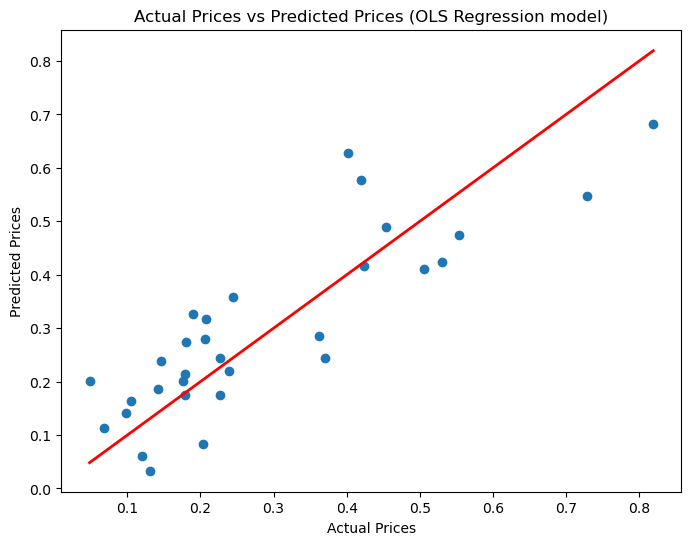

Training set:
MSE: 0.01025055
R²: 0.72

Test set:
MSE: 0.00994092
R²: 0.72

OLS Regression Equation：
y = 0.5128 + (0.1749 * Median income) + (0.4751 * Bachelor degree) + (-0.3443 * Master degree) + (-0.2060 * Professional school degree) + (0.2049 * Doctorate degree) + (-0.2400 * High School Graduate) + (-0.3167 * Associate degree) + (-0.0834 * Unemployment rate)


In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_2b2b_ols = selected_data
data_2b2b_ols = data_2b2b_ols.astype('float64')

# Define arguments and dependent variables
X_2b2b_ols = data_2b2b_ols.drop('median_housing_price', axis=1)
y_2b2b_ols = data_2b2b_ols["median_housing_price"]

X_train_ols_2b2b, X_test_ols_2b2b, y_train_ols_2b2b, y_test_ols_2b2b = train_test_split(X_2b2b_ols, y_2b2b_ols, test_size=0.2, random_state=42)

# Add a constant term to the training set
X_train_ols_2b2b = sm.add_constant(X_train_ols_2b2b)

# Create and fit the OLS model
model_ols_2b2b = sm.OLS(y_train_ols_2b2b, X_train_ols_2b2b)
results_ols_2b2b = model_ols_2b2b.fit()

# Print a summary of the regression results
print(results_ols_2b2b.summary())

# Add a constant item to the test set
X_test_ols_2b2b = sm.add_constant(X_test_ols_2b2b)
X_train_ols_2b2b = sm.add_constant(X_train_ols_2b2b)

# Make predictions on the test set
y_pred_ols_2b2b = results_ols_2b2b.predict(X_test_ols_2b2b)
y_pred_train_ols_2b2b = results_ols_2b2b.predict(X_train_ols_2b2b)

# Create a new figure and set the size
plt.figure(figsize=(8, 6))

# Plot a scatter plot to show the relationship between the actual value and the predicted value
plt.scatter(y_test_ols_2b2b, y_pred_ols_2b2b)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (OLS Regression model)")

# Add the regression line
plt.plot([min(y_test_ols_2b2b), max(y_test_ols_2b2b)], [min(y_test_ols_2b2b), max(y_test_ols_2b2b)], color='red', linewidth=2)

plt.show()


mse_train_2b2b_ols = mean_squared_error(y_train_ols_2b2b, y_pred_train_ols_2b2b)
mse_test_2b2b_ols = mean_squared_error(y_test_ols_2b2b, y_pred_ols_2b2b)


r2_train_2b2b_ols = r2_score(y_train_ols_2b2b, y_pred_train_ols_2b2b)
r2_test_2b2b_ols = r2_score(y_test_ols_2b2b, y_pred_ols_2b2b)


print("Training set:")
print("MSE: {:.8f}".format(mse_train_2b2b_ols))
print("R²: {:.2f}".format(r2_train_2b2b_ols))

print("\nTest set:")
print("MSE: {:.8f}".format(mse_test_2b2b_ols))
print("R²: {:.2f}".format(r2_test_2b2b_ols))

# Get the intercepts and coefficients of the model
intercept = results_ols_2b2b.params[0]
coefficients = results_ols_2b2b.params[1:]

feature_names = X_train_ols_2b2b.columns[1:] 

# Combine the intercept and coefficient into an equation
equation = f"y = {intercept:.4f}"
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.4f} * {feature})"

print("\nOLS Regression Equation：")
print(equation)



## 6. Conclusion of Machine Learning Model Analysis for 2b2b Median Housing Price Prediction <a class="anchor" id="Conclusion-of-Machine-Learning-Model-Analysis-for-2b2b-Median-Housing-Price-Prediction"></a>

**Based on the above results, I select the most important features with large coefficients and p-value less than 0.05 in the OLS model. Because these features may have an important effect on the predicted target variable. In my OLS model, these selected features are a bachelor’s degree and an associate degree. The coefficient of the bachelor’s degree is 0.4751. If all other variables are held constant, we expect the 2b2b median housing price to increase by 0.4751 units when there is an additional person with a bachelor's degree. Conversly, the median housing price is expected to decline by 0.3167 units per associate degree increase, likely because people with associate degrees live in less affordable areas.**

## 7. 2b2b Housing Price Distribution Map <a class="anchor" id="2b2b-Housing-Price-Distribution-Map"></a>

We use Folium and Branca libraries to create an interactive map based on latitude and longitude to show the price distribution of 2B2B properties. First, we calculate the value of price per square foot, and then divide the value of price per square foot into different colors based on the quantile (0.2, 0.4, 0.6, 0.8). Then, you create a map with Folium and use Folium's CircleMarker method to add marker points on the map and set their color and size. Finally, create a custom legend using Branca and add it to the map.

In [20]:
import pandas as pd
import folium
import branca

data_dis = filtered_2b2b_df

data_dis = data_dis.copy()

data_dis['price_per_sqft'] = data_dis['price'] / data_dis['sqft']

# Calculate quantiles
quantiles = data_dis['price_per_sqft'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Create a map with the average latitude and longitude of the data set as the center point
map = folium.Map(location=[data_dis['latitude'].mean(), data_dis['longitude'].mean()], zoom_start=12)

# Use quantiles to assign colors
def price_to_color(price_per_sqft):
    if price_per_sqft < quantiles[0]:
        return 'blue'
    elif price_per_sqft < quantiles[1]:
        return 'green'
    elif price_per_sqft < quantiles[2]:
        return 'orange'
    elif price_per_sqft < quantiles[3]:
        return 'red'
    else:
        return 'purple'

for index, row in data_dis.iterrows():
    # Use the price per sqft to set the color
    color = price_to_color(row['price_per_sqft'])

    # Add a marker to the map
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color=color,
        fill=True,
        fill_opacity=0.3
    ).add_to(map)
    
    
# Define legend colors and price levels
colors = ['#0000FF', '#008000', '#FFA500', '#FF0000', '#800080']
price_ranges = [
    f'<strong>{quantiles[0]:.2f}</strong>',
    f'<strong>{quantiles[0]:.2f}</strong> - <strong>{quantiles[1]:.2f}</strong>',
    f'<strong>{quantiles[1]:.2f}</strong> - <strong>{quantiles[2]:.2f}</strong>',
    f'<strong>{quantiles[2]:.2f}</strong> - <strong>{quantiles[3]:.2f}</strong>',
    f'> <strong>{quantiles[3]:.2f}</strong>'
]

# Create custom legends
legend_html = '''
<div style="position: fixed; bottom: 50px; right: 50px; width: 150px; height: 120px; z-index:9999; font-size:14px;">
    &nbsp;<b>Price Level (Price per square foot)</b><br>
'''
for color, price_range in zip(colors, price_ranges):
    legend_html += f'<i style="background: {color}; width: 15px; height: 15px; float: left; margin-right: 5px;"></i>{price_range}<br>'

legend_html += '</div>'

# Add a legend to the map
legend = branca.element.Element(legend_html)
map.get_root().html.add_child(legend)

map


### Important Note: If you can not see above map when you open this Jupyter Notebook file, please re-run the code. I also attached a png file in below block.


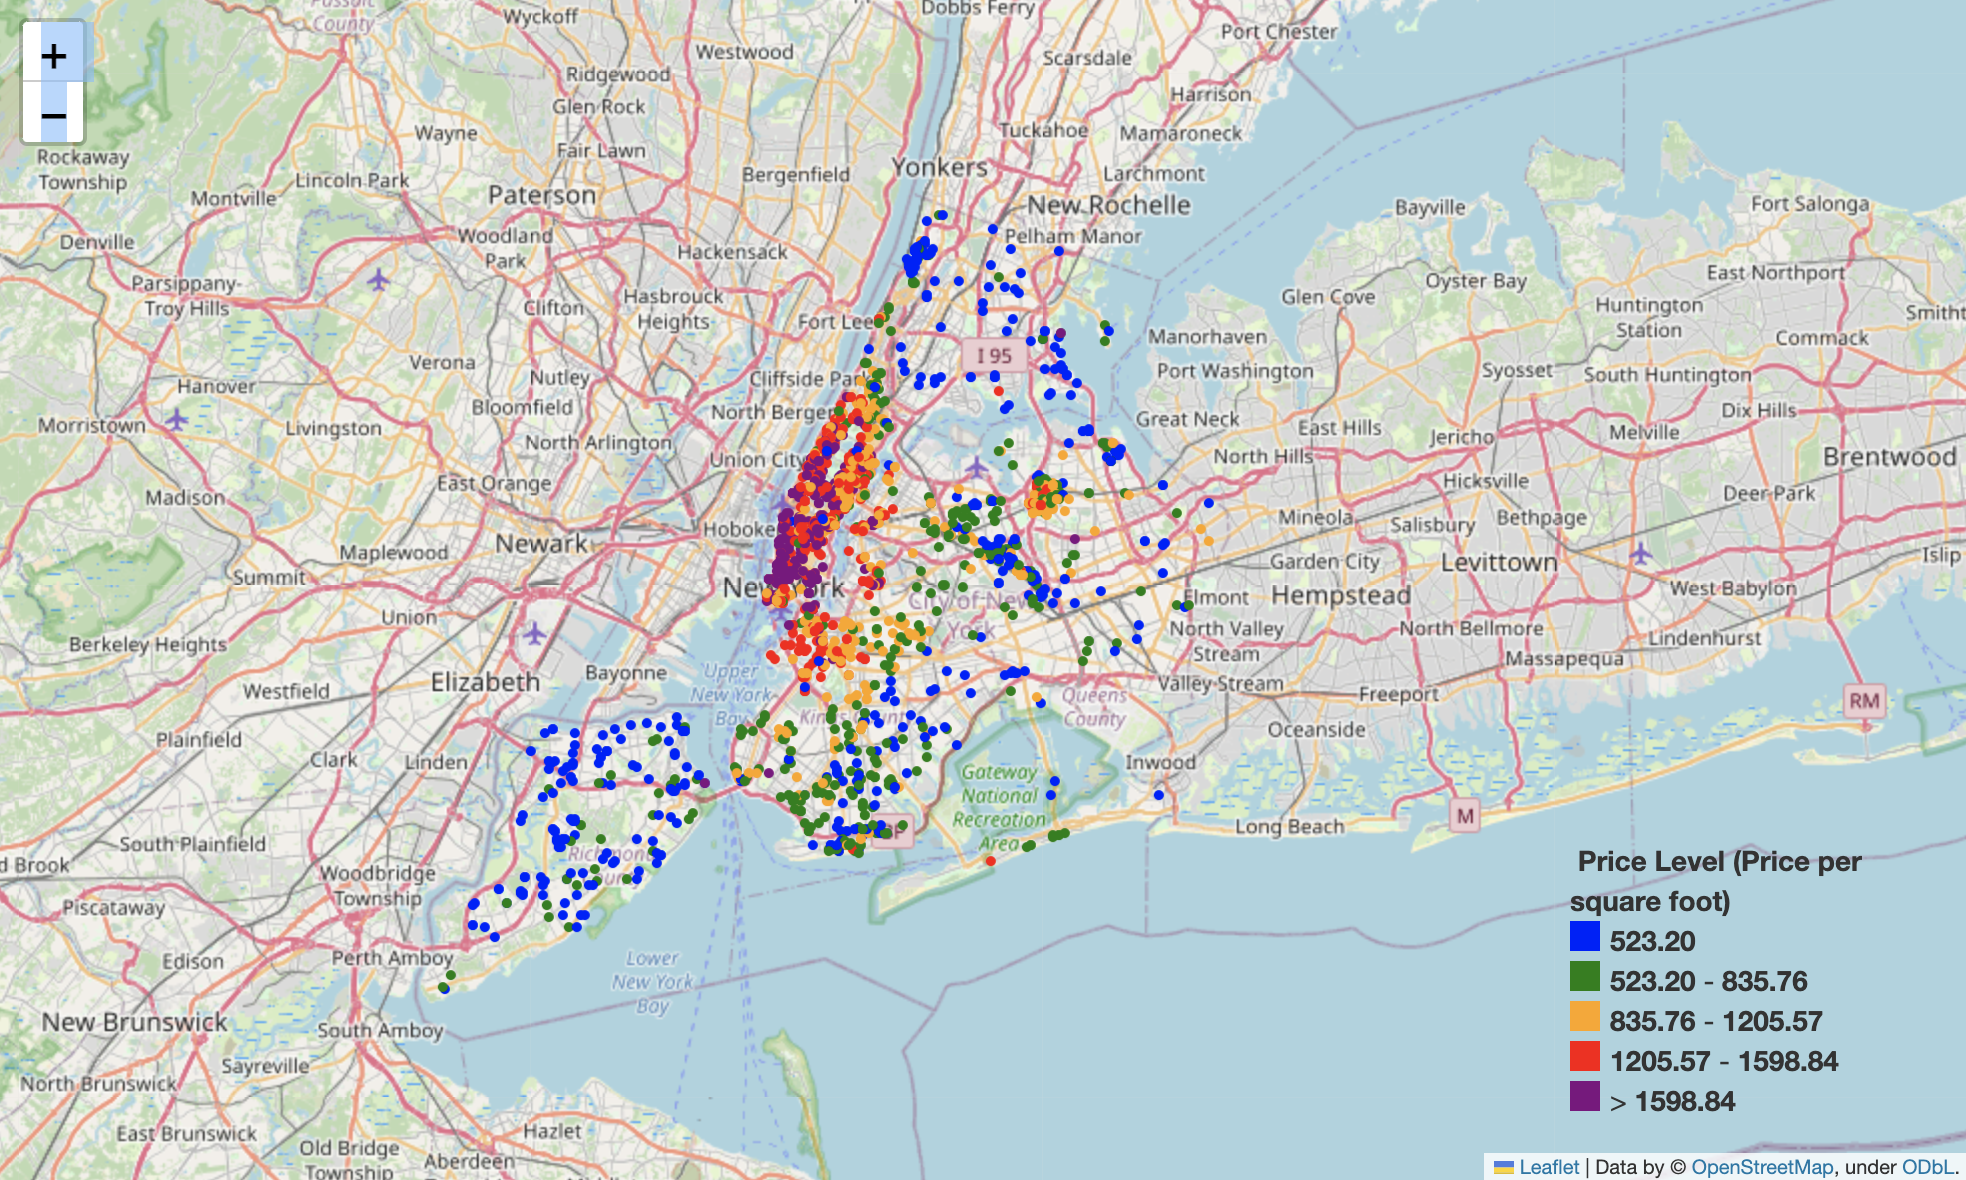

**Here, the quantiles are used to divide 2b2b housing prices (Price per square foot) into five price level. Through this map, we can visually see the price level of each region. We see higher housing prices concentrate on the lower side of Manhattan.**

## Project Conclusions <a class="anchor" id="Project-Conclusions"></a>

1. Compared with decision tree and Lasso linear regression, **Random Forest prediction model is more suitable for all our housing price data**, and Random Forest model performance is also highest for our data set.


2. In predicting housing prices, the housing space, **bachelor’s degree percentage, the number of the restaurants and supermarkets, bathrooms are important feature, which means they affect the houing price more than other features**. 


3. In predicting 2b2b median housing prices, the **bachelor's degree percentage** and **associate's degree percentage** are the moat important feature for predicting 2b2b median housing prices. If all the other variables are held constant, the median home price would **increase by 0.4751 units** for each additional unit of bachelor's degree. Conversely, if all the other variables are held constant, for every additional associate's degree, the median home price is projected to **decline by 0.3167 units**.


4. **Higher housing prices** concentrate on the **lower side of Manhattan**.